In [1]:
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftfreq, fftshift
import datetime
from datetime import datetime

In [2]:
df = pd.read_table('promsol.txt', delim_whitespace = 2, names= ("Año", "mes", "mes-año", "PromSol", "I", "O"), header = int(0))

In [3]:
df.head()

,Año,mes,mes-año,PromSol,I,O
0,1749,1,1749.042,96.7,-1.0,-1
1,1749,2,1749.123,104.3,-1.0,-1
2,1749,3,1749.204,116.7,-1.0,-1
3,1749,4,1749.288,92.8,-1.0,-1
4,1749,5,1749.371,141.7,-1.0,-1


In [6]:
df.tail(3)

,Año,mes,mes-año,PromSol,I,O
3210,2016,7,2016.540,32.5,3.7,910
3211,2016,8,2016.624,50.7,4.4,879
3212,2016,9,2016.708,44.7,3.8,742


In [27]:
df.describe()

,Año,mes,mes-año,PromSol,I,O
count,3213.000000,3213.000000,3213.000000,3213.000000,3213.000000,3213.000000
mean,1882.375350,6.495798,1882.873012,82.923561,5.610955,89.781201
std,77.304865,3.451370,77.304802,67.819418,5.234367,185.247160
min,1749.000000,1.000000,1749.042000,0.000000,-1.000000,-1.000000
25%,1815.000000,3.000000,1815.958000,25.300000,-1.000000,-1.000000
50%,1882.000000,6.000000,1882.874000,69.700000,5.400000,30.000000
75%,1949.000000,9.000000,1949.790000,123.300000,9.400000,31.000000
max,2016.000000,12.000000,2016.708000,398.200000,23.500000,977.000000


In [7]:
#Transformada de Fourier para datos
from scipy.fftpack import fft, fftfreq, fftshift
import numpy as np
# number of points
N = 3213
# sample spacing
T = 1.0
y = df['PromSol']
yf = fft(y)
xf = fftfreq(N, T)
xf = fftshift(xf)
yplot = fftshift(yf)

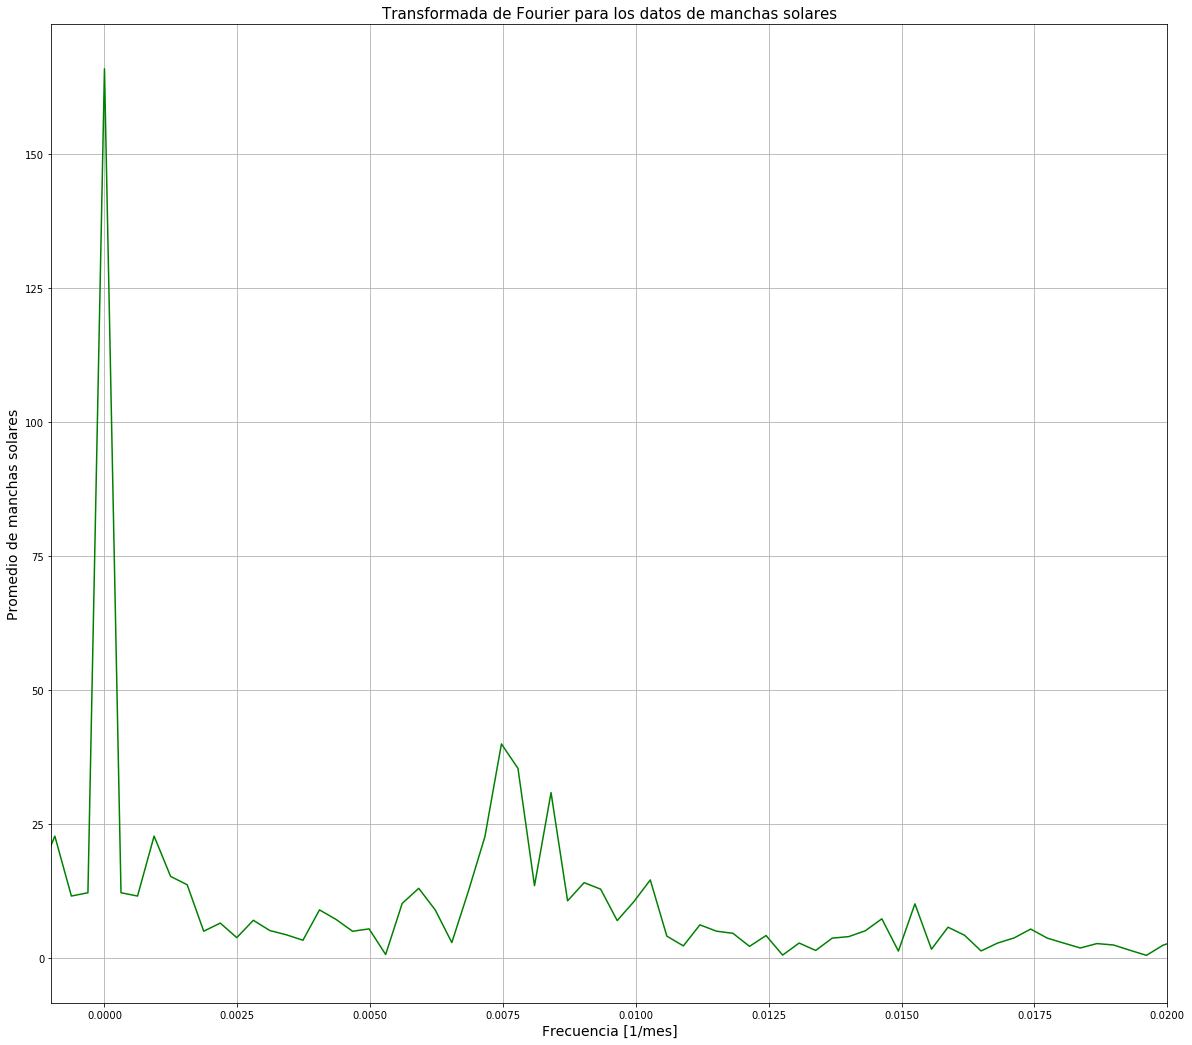

In [49]:
#grafica de lo obtenido con la transformada de Fourier
import matplotlib.pyplot as plt
graf = plt.plot(xf, 2.0/N*abs(yplot), 'g-')
plt.xlim(-0.001,0.02)
plt.grid(True)

plt.xlabel('Frecuencia [1/meses]', fontsize=14)
plt.ylabel('Promedio de manchas solares', fontsize=14)
plt.title('Transformada de Fourier para los datos de manchas solares', fontsize=15)

fig = plt.gcf()
fig.set_size_inches(20, 18)
plt.show()

In [9]:
a = 2*np.absolute(yf)/N
a

array([ 165.84712107,   12.2404616 ,   11.62644929, ...,   22.79918361,
         11.62644929,   12.2404616 ])

In [17]:
print(np.where(a[:,]>15.0))
b= a[a[:,]> 15.0]
b

(array([   0,    3,    4,   23,   24,   25,   27, 3186, 3188, 3189, 3190,
       3209, 3210], dtype=int64),)


array([ 165.84712107,   22.79918361,   15.28281214,   22.67815211,
         39.98723321,   35.419832  ,   30.90803788,   30.90803788,
         35.419832  ,   39.98723321,   22.67815211,   15.28281214,
         22.79918361])

In [53]:
#La 0 es la que se encuentra en el origen, pues es el número de manchas promedio
print('Primer modo principal')
print('Amplitud=',2.0*np.absolute(yf[23,]/N))
print('frecuencia=', xf[int(N/2 +23),])
print('periodo en meses=', 1/xf[int(N/2 +23),])
print('periodo en años=', 1/xf[int(N/2 +23),]*1/12)
print()

print( 'Segundo modo principal')
print('Amplitud=',2.0*np.absolute(yf[24,]/N))
print('frecuencia=', xf[int(N/2 +24),])
print('periodo en meses', 1/xf[int(N/2 +24),])
print('periodo en años=', 1/xf[int(N/2 +24),]*1/12)
print()

print('Tercero modo principal')
print('Amplitud=',2.0*np.absolute(yf[25,]/N))
print('frecuencia=', xf[int(N/2 +25),])
print('periodo en meses', 1/xf[int(N/2 +25),])
print('periodo en años=', 1/xf[int(N/2 +25),]*1/12)
print()

print('Cuarto modo principal')
print('Amplitud=',2.0*np.absolute(yf[27,]/N))
print('frecuencia=', xf[int(N/2 +27),])
print('periodo en meses=', 1/xf[int(N/2 +27),])
print('periodo en años=', 1/xf[int(N/2 +27),]*1/12)
print()

#otros modos importantes
print('modo relevante')
print('Amplitud=',2.0*np.absolute(yf[3,]/N))
print('frecuencia=', xf[int(N/2 +3),])
print('periodo en meses=', 1/xf[int(N/2 +3),])
print('periodo en años=', 1/xf[int(N/2 +3),]*1/12)
print()
print('modo relevante')
print('Amplitud=',2.0*np.absolute(yf[4,]/N))
print('frecuencia=', xf[int(N/2 +4),])
print('periodo en meses=', 1/xf[int(N/2 +4),])
print('periodo en años=', 1/xf[int(N/2 +4),]*1/12)
print()
print('modo relevante')
print('Amplitud=',2.0*np.absolute(yf[23,]/N))
print('frecuencia=', xf[int(N/2 +23),])
print('periodo en meses=', 1/xf[int(N/2 +23),])
print('periodo en años=', 1/xf[int(N/2 +23),]*1/12)
print()

#Amltura del promedio total
print('Promedio de manchas solares total=', np.absolute(yf[0,]/N))

Primer modo principal
Amplitud= 22.6781521056
frecuencia= 0.00715841892312
periodo en meses= 139.695652174
periodo en años= 11.6413043478

Segundo modo principal
Amplitud= 39.9872332086
frecuencia= 0.00746965452848
periodo en meses 133.875
periodo en años= 11.15625

Tercero modo principal
Amplitud= 35.4198320032
frecuencia= 0.00778089013383
periodo en meses 128.52
periodo en años= 10.71

Cuarto modo principal
Amplitud= 30.9080378809
frecuencia= 0.00840336134454
periodo en meses= 119.0
periodo en años= 9.91666666667

modo relevante
Amplitud= 22.7991836131
frecuencia= 0.00093370681606
periodo en meses= 1071.0
periodo en años= 89.25

modo relevante
Amplitud= 15.2828121366
frecuencia= 0.00124494242141
periodo en meses= 803.25
periodo en años= 66.9375

modo relevante
Amplitud= 22.6781521056
frecuencia= 0.00715841892312
periodo en meses= 139.695652174
periodo en años= 11.6413043478

Promedio de manchas solares total= 82.9235605353


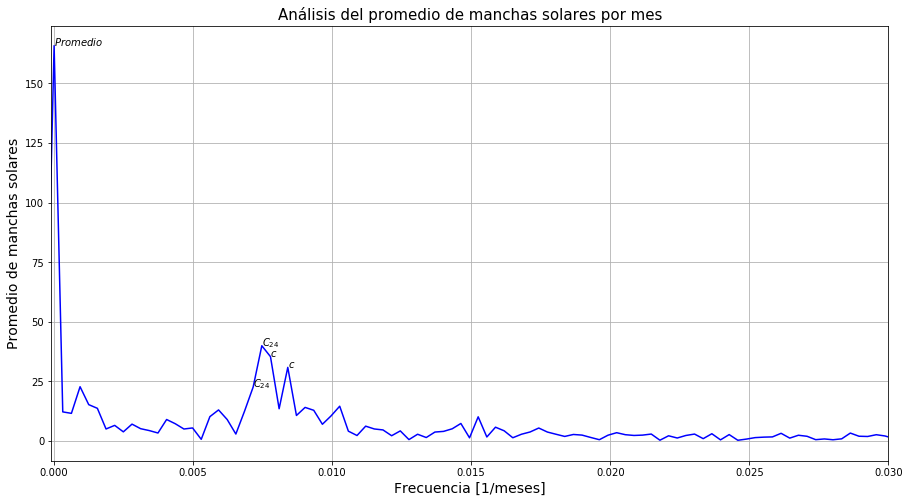

In [48]:
fig = plt.gcf()
fig.set_size_inches(15, 8)

plt.plot(xf, 2.0/N *np.abs(yplot), 'b')
plt.xlim(-0.0001, 0.03) 
plt.grid(True)
plt.xlabel('Frecuencia [1/meses]', fontsize=14)
plt.ylabel('Promedio de manchas solares', fontsize=14)
plt.title('Análisis del promedio de manchas solares por mes', fontsize=15)

plt.text(0, 2*82.9235605353, '$Promedio$')
plt.text(0.00715841892312, 22.6781521056, '$C_{24}$')
plt.text(0.00746965452848, 39.9872332086, '$ C_{24}$')
plt.text(0.00778089013383, 35.4198320032, '$c$')
plt.text(0.00840336134454, 30.9080378809, '$c$')
plt.show()

In [47]:
#Promedio de los valores obtenidos para los ciclos
g= 1/xf[int(N/2 +23),]*1/12
h= 1/xf[int(N/2 +24),]*1/12
j= 1/xf[int(N/2 +25),]*1/12
cicloprom = (g+h+j)/3
cicloprom

11.169184782608696